In [1]:
!git clone https://github.com/HighCWu/flux-4bit

Cloning into 'flux-4bit'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 2.71 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [1]:

%cd flux-4bit

/flux-4bit


In [3]:
!pip install -r requirements.txt
!pip install protobuf sentencepiece

  Cloning https://github.com/mobiusml/hqq (to revision 306e30d) to /tmp/pip-install-1nfnsmqy/hqq_8b4b5b377032431a8e8ff660b55127c4
  Running command git clone --filter=blob:none --quiet https://github.com/mobiusml/hqq /tmp/pip-install-1nfnsmqy/hqq_8b4b5b377032431a8e8ff660b55127c4
  Running command git checkout -q 306e30d
  Resolved https://github.com/mobiusml/hqq to commit 306e30d
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 114.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 208.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.8 MB/s eta 0:00:00
  Created wheel for hqq: filename=hqq-0.2.0-py3-none-any.whl size=63225 sha256=eee43e477a8e714a1d9a44276c55ba1de59d62fae42e56c21c58c70c587d7967
  Stored in directory: /tm

In [4]:
!pip install git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-g9g5n86h
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-g9g5n86h
  Resolved https://github.com/huggingface/diffusers.git to commit ad5ecd1251472dbc69da1268671d41bc2d8c1caa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-py3-none-any.whl size=2977366 sha256=4d8992cd91632bddfcc1cd06cc0b99899fc85ca328bb6c3cce945ee3671fd1cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-6lamyf_v/wheels/d2/5c/5f/16639722ea17ecb73ab461b81718584bac08af2801619786b9
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.31.0
    Uninstalling diffusers-0.31.0:
      Successfully uninstalled diffusers-0.31.0


In [2]:

%run /flux-4bit/model.py

In [3]:

import torch

# from diffusers import FluxPipeline
from diffusers.utils import load_image
from diffusers import FluxControlNetPipeline, FluxControlNetModel

In [4]:
text_encoder_2: T5EncoderModel = T5EncoderModel.from_pretrained(
    "HighCWu/FLUX.1-dev-4bit",
    subfolder="text_encoder_2",
    torch_dtype=torch.bfloat16,
    # hqq_4bit_compute_dtype=torch.float32,
)

transformer: FluxTransformer2DModel = FluxTransformer2DModel.from_pretrained(
    "HighCWu/FLUX.1-dev-4bit",
    subfolder="transformer",
    torch_dtype=torch.bfloat16,
)

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


In [ ]:
controlnet = FluxControlNetModel.from_pretrained(
    'Shakker-Labs/FLUX.1-dev-ControlNet-Union-Pro',
    torch_dtype=torch.bfloat16
    )

pipe = FluxControlNetPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    text_encoder_2=text_encoder_2,
    controlnet=controlnet,
    transformer=transformer,
    torch_dtype=torch.bfloat16,
    token="Enter_your_hf_tokens_here"
)

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/6.60G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [28]:
pipe.remove_all_hooks()
pipe.to('cuda')


FluxControlNetPipeline {
  "_class_name": "FluxControlNetPipeline",
  "_diffusers_version": "0.32.0.dev0",
  "_name_or_path": "black-forest-labs/FLUX.1-dev",
  "controlnet": [
    "diffusers",
    "FluxControlNetModel"
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "__main__",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "__main__",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [7]:
!pip install controlnet-aux
from controlnet_aux import LineartDetector
processor = LineartDetector.from_pretrained("lllyasviel/Annotators")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 1.1 MB/s eta 0:00:0000:0100:020m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 9.2 MB/s eta 0:00:0000:0100:01


/opt/conda/lib/python3.11/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


sk_model.pth:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

sk_model2.pth:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

/opt/conda/lib/python3.11/site-packages/controlnet_aux/lineart/__init__.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, ma

In [18]:
image=load_image("https://cloudfront-eu-central-1.images.arcpublishing.com/diarioas/QELKKPYNDBIVVHPL5ON7DG7NPQ.jpg")
control_image = processor(image)

In [41]:
link="https://csvtu.ac.in/ew/pics/DigiVarsity.png"
image=load_image(link)
control_image = processor(image)

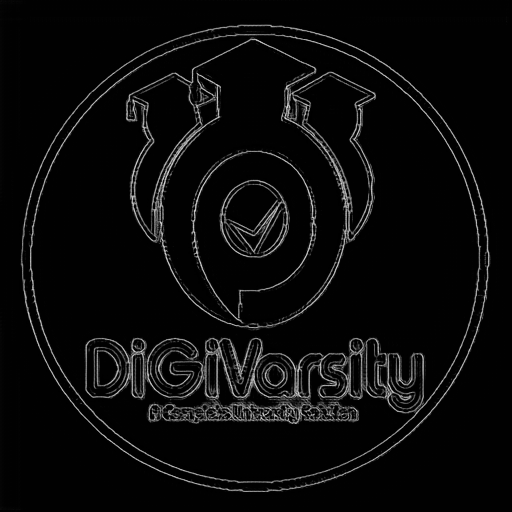

In [42]:
control_image

  0%|          | 0/38 [00:00<?, ?it/s]

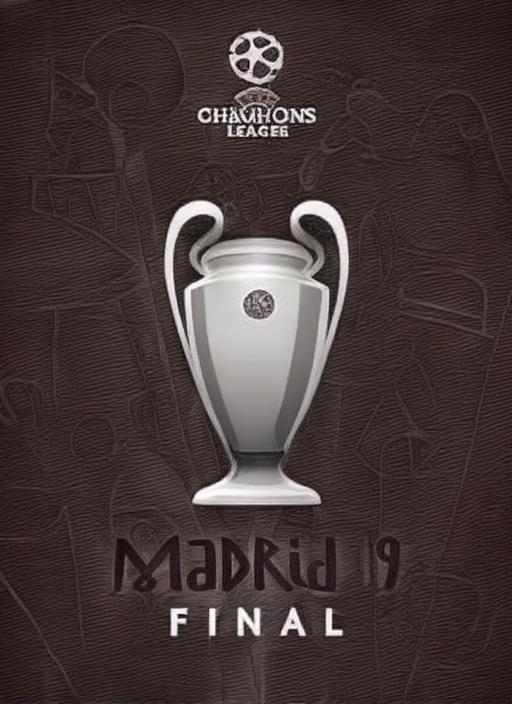

In [35]:
controlnet_conditioning_scale = .8
width, height = control_image.size

prompt = 'print a poster with text "CHAMPIONS LEAGUE" at top and "MADRID" and "FINAL" at bottom'

image2 = pipe(
    prompt,
    control_image=control_image,
    control_mode=0,
    width=width,
    height=height,
    controlnet_conditioning_scale=controlnet_conditioning_scale,
    num_inference_steps=38,
    guidance_scale=2.4,
).images[0]
image2.save("image.jpg")
load_image("image.jpg")

In [ ]:
"Outputs Eligible Text without distortion"

  0%|          | 0/38 [00:00<?, ?it/s]

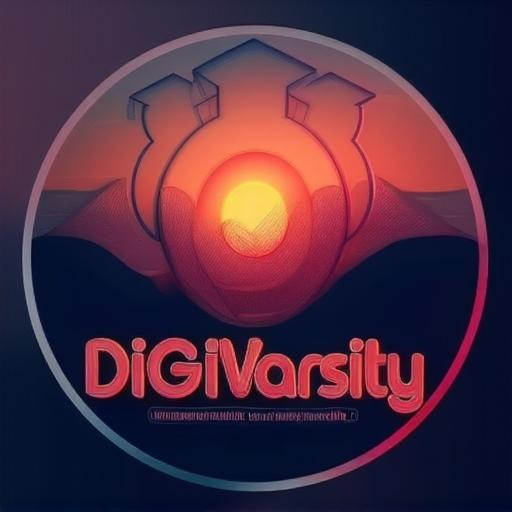

In [46]:
controlnet_conditioning_scale = .65
width, height = control_image.size

prompt = 'print a poster for a website with text "DIGIVARSITY" , make background as sunset mountain college '

image2 = pipe(
    prompt,
    control_image=control_image,
    control_mode=0,
    width=width,
    height=height,
    controlnet_conditioning_scale=controlnet_conditioning_scale,
    num_inference_steps=38,
    guidance_scale=3.2,
).images[0]
image2.save("image.jpg")
load_image("image.jpg")